## Model Creation and Training

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
# Loading the data
data = pd.read_csv("datasets/feature_selected_data.csv", index_col=0)

In [4]:
print(data.shape)
data.head()

(26953, 48)


,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,ldl_url,ldl_path,urlLen,...,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,Entropy_Domain,Entropy_DirectoryName,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,0,0,58,...,1.000000,0.0,8,3,2,1,0,0.784493,0.894886,0
1,0,4,5,5.5,14,6.000000,4,0,0,66,...,0.022008,0.0,8,3,3,0,0,0.784493,0.814725,0
2,0,4,5,5.5,14,5.800000,4,0,0,65,...,0.022008,0.0,8,3,3,0,0,0.784493,0.814725,0
3,0,4,12,5.5,14,5.500000,4,0,0,109,...,0.022008,0.0,8,3,3,0,0,0.784493,0.814725,0
4,0,4,6,5.5,14,7.333334,4,0,0,81,...,0.022008,0.0,8,3,3,0,0,0.784493,0.814725,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [7]:
# Splitting the dataset to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [8]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (21562, 47) (21562,)
Test data shape: (5391, 47) (5391,)


In [9]:
classifier = RandomForestClassifier(n_estimators=20, random_state=42)

In [10]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

## Model Evaluation

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Loading the encoder file
with open("label_encoder.pkl", "rb") as file:
    encoder = pickle.load(file)

In [13]:
# Getting the model's predictions on the test set
pred = classifier.predict(X_test)

In [21]:
print(classification_report(y_test, pred))
print("\nModel Accuracy: {:.4f}".format(accuracy_score(y_test, classifier.predict(X_test))))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1006
           1       0.97      0.99      0.98      1514
           2       0.97      0.85      0.91       340
           3       0.94      0.96      0.95      1488
           4       0.98      0.97      0.98      1043

    accuracy                           0.96      5391
   macro avg       0.97      0.95      0.96      5391
weighted avg       0.96      0.96      0.96      5391


Model Accuracy: 0.9636


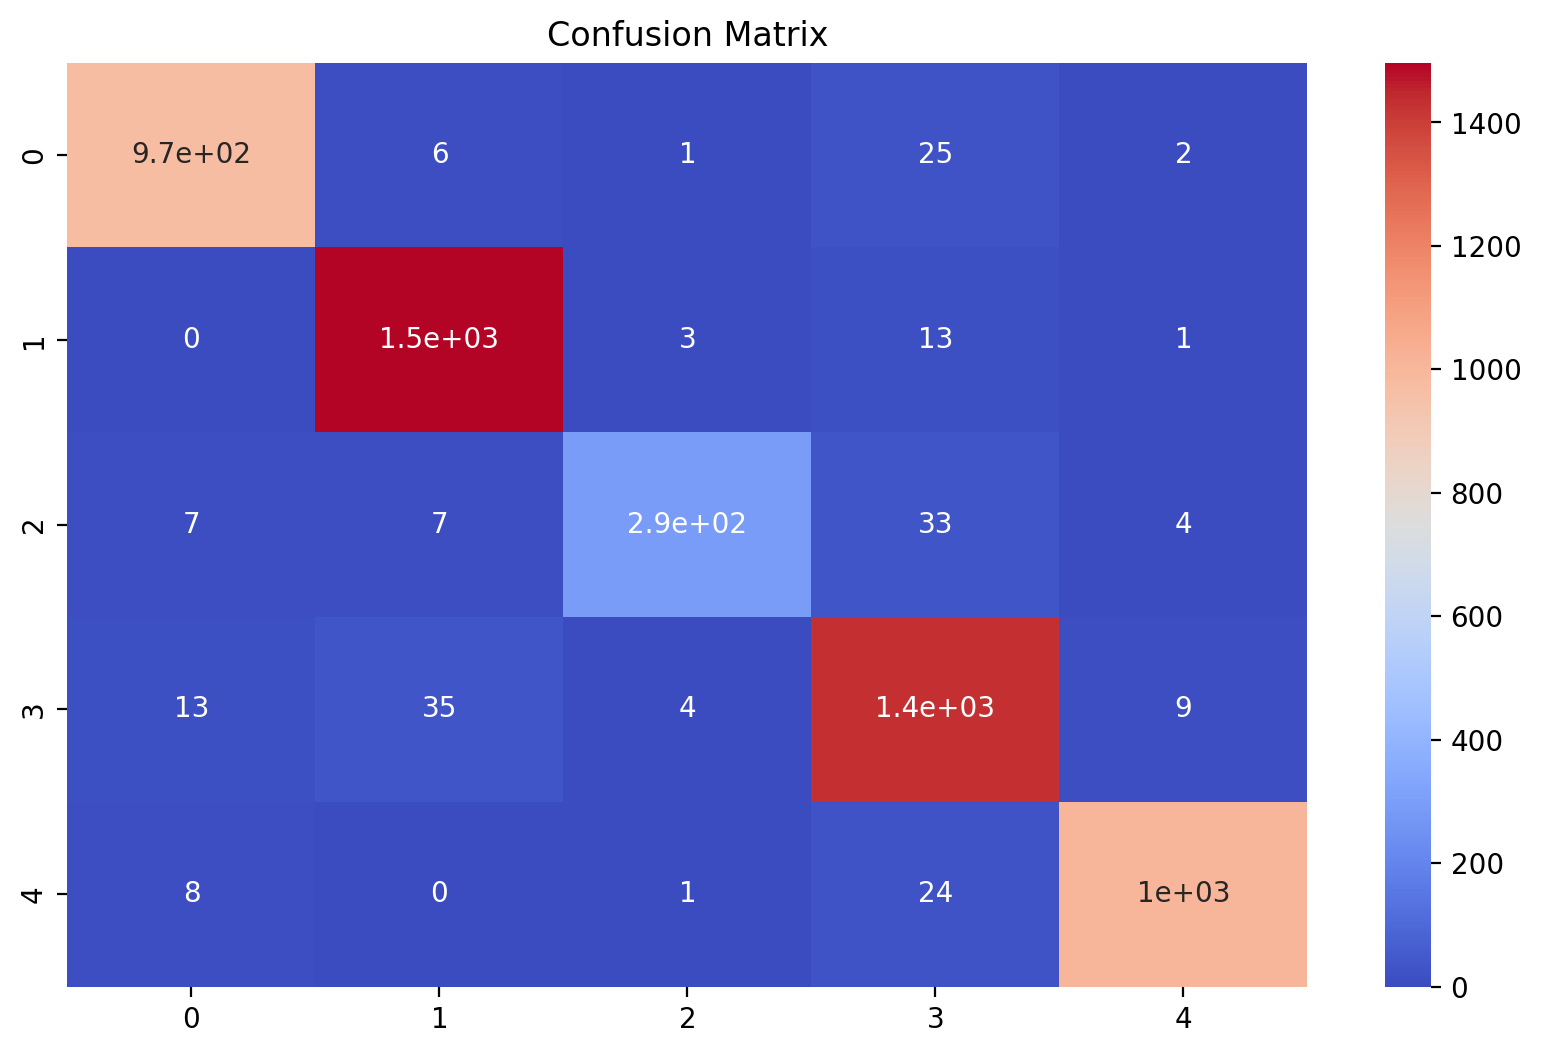

In [22]:
# Getting the confusion matrix for the model's performance
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(
    confusion_matrix(y_test, pred),
    annot=True,
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_,
    cmap="coolwarm"
)
plt.title("Confusion Matrix")
plt.savefig("./plots/final_classifier_confusion_matrix")
plt.show()

In [23]:
# Saving the model
with open("random_forest_classifier_model.pkl", "wb") as file:
    pickle.dump(classifier, file)